## Detailed **function-by-function** overview

Before to dive deep into detailed `function-by-function` in **PyCaret**, let's first take a look at the **PyCaret** workflow.

### PyCaret Workflow

PyCaret's workflow consists of **six** steps and the entire process can be deployed with as little as **two** lines of code.

1. **Setup Environment**: The first step of any machine learning experiment in PyCaret is to setup the environment by importing the required module and initializing the environment. This is accomplished by importing the `pycaret` module and initializing `setup()`. The `setup()` function initializes the environment in pycaret and creates the transformation pipeline to prepare the data for modeling and deployment. It performs some of the mandatory steps required for any dataset to go through before it can be used for training and testing. For instance, it performs missing value imputation, categorical encoding, rare label removal, train-test split, and more (see [setup](https://pycaret.gitbook.io/docs/get-started/quickstart) for details).

2. **Compare Models**: This is the most exciting step in PyCaret. This function trains and compares the performance of all available models in the model library using cross-validation. The output prints a score grid that shows average MAE, MSE, RMSE, R2, RMSLE and MAPE accross the folds (10 by default) of all the available models in the model library.

3. **Create Model**: This function trains a model on the complete dataset passed during the setup stage. The output prints a score grid that shows MAE, MSE, RMSE, R2, RMSLE and MAPE by fold.

4. **Tune Model**: This function tunes the hyperparameters of a model using `Random Grid Search` on a pre-defined search space. The output prints a score grid that shows Accuracy, AUC, Recall, Precision, F1, Kappa and MCC by fold.

5. **Plot Model**: This function takes a trained model object and returns a plot (based on the type of model passed during setup) that helps evaluate the performance of a model.

6. **Finalize Model**: This function fits the model onto the complete dataset passed during the setup stage. The purpose of this function is to train the model on the complete dataset before it is deployed in production.

7. **Predict Model**: This function is used for generating predictions on new unseen datasets. It requires a trained model object. New unseen data can be passed to the data param as pandas Dataframe. If data is not passed, the test / hold-out set separated at the time of setup is used to generate predictions. It returns a pandas dataframe with predictions.

8. **Save / Load Model**: This function saves the transformation pipeline and trained model object into the current active directory as a pickle file for later use. All saved models are prefixed with the name `pkl_`. This function returns the entire transformation pipeline and trained model object as a `pickle` file which can be used to re-load the pipeline and model object in future environment.

9. **Deploy Model**: This function deploys the transformation pipeline and trained model object to the specified platform for production. Currently `AWS` and `Azure` are supported. This function requires `AWS` or `Azure` credentials along with the name of the `experiment` to be passed as a string. PyCaret's `deploy_model` also returns a link to the `API` endpoint which is printed in the notebook as a clickable link.

10. **Interpret Model**: This function returns an interpretation plot based on the type of model passed during setup. For tree-based ensembles, an `interpret_model` function is also available. This function only supports tree-based models viz. `Random Forest`, `Decision Tree`, `Extra Trees`, `Gradient Boosting`, and `AdaBoost`. For tree-based models, this function creates a `SHAP` summary plot.

11. **Automate Model**: This function trains and evaluates performance of all models available in the model library using cross-validation. The output prints a score grid that shows MAE, MSE, RMSE, R2, RMSLE and MAPE by fold. The `automl()` function is a drop-in replacement for the `compare_models()` function. The difference is that `automl()` is a time-based cross-validation (unlike the stratified fold used in `compare_models()`). The `automl()` function is designed for `medium` to `large` datasets and uses a stratified sample from the original dataset. The `automl()` function can be used for `binary` or `multiclass` problems.

12. **Save Experiment**: This function saves the entire `experiment` into the current active directory as a pickle file for later use. All objects in the `environment` are sequentially numbered and saved as `pickle` files in the current active directory. For example, the transformation pipeline is saved as `Transformation_Pipeline.pkl` and the trained model object is saved as `Trained_Model.pkl` and so on. This function returns a dictionary with all objects in the environment.

13. **Load Experiment**: This function loads objects sequentially numbered in the current active directory into the current python environment. For example, `Transformation_Pipeline.pkl` will be loaded as `Transformation_Pipeline` and `Trained_Model.pkl` will be loaded as `Trained_Model` and so on. This function returns a dictionary with all objects in the environment.

14. **Get Config**: This function retrieves the global `config` variable from the `pycaret` module. It can be used to view the global `config` parameters or change them by passing a dictionary to change the `config` param.

Without further do, let's dive deep into detailed `function-by-function` by reviewing steps we already walk through in the previews `EXP_Insurance - Regression` notebook.

In [2]:
# !pip install pycaret
import pycaret
pycaret.__version__

'3.1.0'

In [3]:
# load sample dataset from pycaret dataset module
from pycaret.datasets import get_data
data = get_data('insurance')

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


##### Setup
The `setup()` function initializes the training environment and creates the transformation pipeline. Setup function must be called before executing any other function in PyCaret. It only has two required parameters, i.e. `data` and `target`. All the other parameters are optional.

In [4]:
# import pycaret regression and init setup
from pycaret.regression import *
s = setup(data, target= 'charges', session_id=123)

,Description,Value
0,Session id,123
1,Target,charges
2,Target type,Regression
3,Original data shape,"(1338, 7)"
4,Transformed data shape,"(1338, 10)"
5,Transformed train set shape,"(936, 10)"
6,Transformed test set shape,"(402, 10)"
7,Ordinal features,2
8,Numeric features,3
9,Categorical features,3


Once the setup has been successfully executed it shows the information grid containing experiment level information. 

- **Session id:**  A pseudo-random number distributed as a seed in all functions for later reproducibility. If no `session_id` is passed, a random number is automatically generated that is distributed to all functions.<br/>
<br/>
- **Target type:**  Binary, Multiclass, or Regression. The Target type is automatically detected. <br/>
<br/>
- **Original data shape:**  Shape of the original data prior to any transformations. <br/>
<br/>
- **Transformed train set shape :**  Shape of transformed train set <br/>
<br/>
- **Transformed test set shape :**  Shape of transformed test set <br/>
<br/>
- **Numeric features :**  The number of features considered as numerical. <br/>
<br/>
- **Categorical features :**  The number of features considered as categorical. <br/>

PyCaret has two set of API's that you can work with. (1) Functional (as seen above) and (2) Object Oriented API.

With Object Oriented API instead of executing functions directly you will import a class and execute methods of class.

In [4]:
# import `RegressionExperiment()` class and initiate it
from pycaret.regression import RegressionExperiment
exp = RegressionExperiment()

In [5]:
# check the `type()` of exp
type(exp)

pycaret.regression.oop.RegressionExperiment

In [8]:
# init `setup()` function on exp
exp.setup(data, target='charges', session_id=123)

,Description,Value
0,Session id,123
1,Target,charges
2,Target type,Regression
3,Original data shape,"(1338, 7)"
4,Transformed data shape,"(1338, 10)"
5,Transformed train set shape,"(936, 10)"
6,Transformed test set shape,"(402, 10)"
7,Ordinal features,2
8,Numeric features,3
9,Categorical features,3


##### Compare Models

In [6]:
# compare baseline models
best = compare_models()

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,22:32:30
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Linear Regression


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2701.9919,23548657.1177,4832.9329,0.8320,0.4447,0.3137,0.0630
rf,Random Forest Regressor,2771.4583,25416502.3827,5028.6343,0.8172,0.4690,0.3303,0.1330
lightgbm,Light Gradient Boosting Machine,2992.1828,25521038.3331,5042.0978,0.8149,0.5378,0.3751,32.2970
et,Extra Trees Regressor,2833.3624,28427844.2412,5305.6516,0.7991,0.4877,0.3363,0.1260
ada,AdaBoost Regressor,4316.0568,29220505.6498,5398.4561,0.7903,0.6368,0.7394,0.0490
lar,Least Angle Regression,4303.5559,38388058.4578,6176.5920,0.7306,0.5949,0.4433,0.0460
llar,Lasso Least Angle Regression,4303.7694,38386824.2786,6176.4846,0.7306,0.5952,0.4434,0.0450
br,Bayesian Ridge,4311.2349,38391950.0874,6176.8896,0.7306,0.5910,0.4447,0.0510
ridge,Ridge Regression,4317.6984,38396435.9578,6177.2329,0.7306,0.5891,0.4459,0.0450
lasso,Lasso Regression,4303.7697,38386797.6709,6176.4824,0.7306,0.5952,0.4434,0.0490


In [9]:
# compare models using OOP, this step needs to run the `setup()` function first
# exp.compare_models()

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,22:40:39
Status,. . . . . . . . . . . . . . . . . .,Loading Estimator
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2701.9919,23548657.1177,4832.9329,0.8320,0.4447,0.3137,0.0800
rf,Random Forest Regressor,2771.4583,25416502.3827,5028.6343,0.8172,0.4690,0.3303,0.1480
lightgbm,Light Gradient Boosting Machine,2992.1828,25521038.3331,5042.0978,0.8149,0.5378,0.3751,34.2150
et,Extra Trees Regressor,2833.3624,28427844.2412,5305.6516,0.7991,0.4877,0.3363,0.1210
ada,AdaBoost Regressor,4316.0568,29220505.6498,5398.4561,0.7903,0.6368,0.7394,0.0640
lar,Least Angle Regression,4303.5559,38388058.4578,6176.5920,0.7306,0.5949,0.4433,0.0430
llar,Lasso Least Angle Regression,4303.7694,38386824.2786,6176.4846,0.7306,0.5952,0.4434,0.0430
br,Bayesian Ridge,4311.2349,38391950.0874,6176.8896,0.7306,0.5910,0.4447,0.0410
ridge,Ridge Regression,4317.6984,38396435.9578,6177.2329,0.7306,0.5891,0.4459,0.0420
lasso,Lasso Regression,4303.7697,38386797.6709,6176.4824,0.7306,0.5952,0.4434,0.0440


GradientBoostingRegressor(random_state=123)

**Note**: Notice that the output between **functional** and **OOP API** is consistent. Rest of the functions in the current notebook will only be shown using **functional API** only.

##### Analyze Model

The `plot_model()` function is used to analyze the performance of a trained model on the **test set**. It may require re-training the model in certain cases. For example, if the model is a **bagging** technique or **boosting** technique and `plot_model()` is used without `ensemble=True` parameter, it will re-train the model using the original dataset.

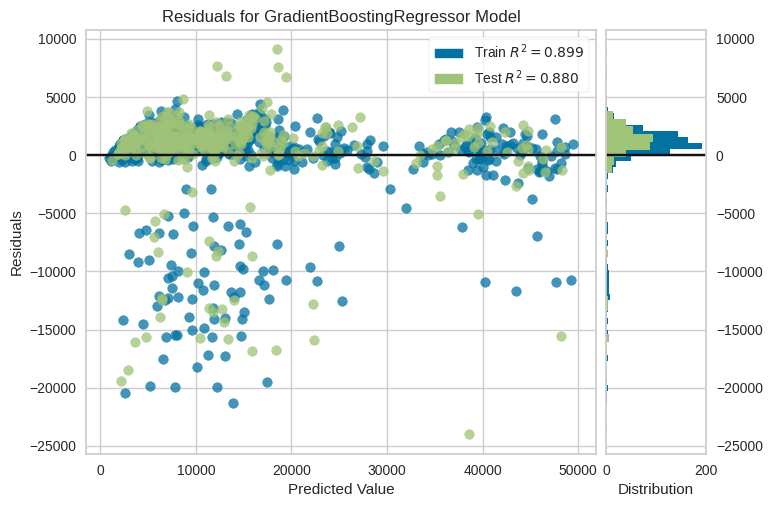

In [10]:
# plot residuals
plot_model(best, plot = 'residuals')

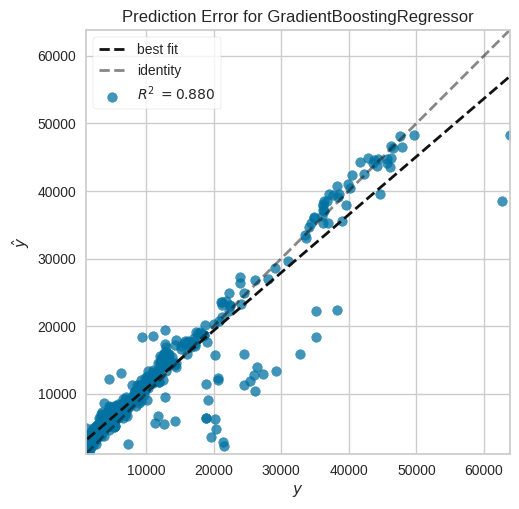

In [11]:
# plot error
plot_model(best, plot = 'error')

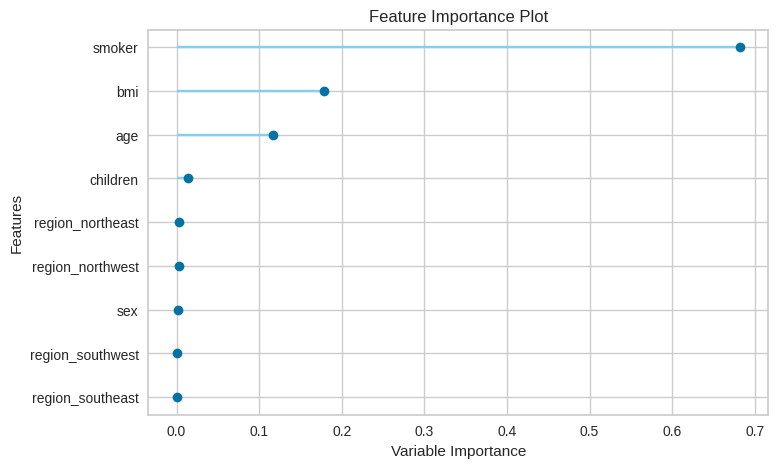

In [12]:
# plot feature importance
plot_model(best, plot = 'feature')

In [14]:
# check docstring to see available plots
# help(plot_model)

An alternative to `plot_model()` function is `evaluate_model()`. It can only be used in **Notebook** since it uses **IPython widgets**, currently, `ipywidget` library. However, the output of `evaluate_model()` is identical to `plot_model()`.

In [17]:
# evaluate_model() function to evaluate model on test dataset
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

##### Prediction

The `predict_model()` function returns `prediction_label` as new column to the input DataFrame. When data is `None` (default), it uses the **test set** (created during the `setup()` function stage) for **scoring**. However, if you are only interested in predictions (no scoring), you can pass `data` parameter with new unseen dataset to the `predict_model()` function.

In [18]:
# predict on test set
holdout_pred = predict_model(best)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,2392.5661,17148355.3169,4141.0573,0.8800,0.3928,0.2875


In [19]:
# show predictions DataFrame (df)
holdout_pred.head()

,age,sex,bmi,children,smoker,region,charges,prediction_label
650,49,female,42.680000,2,no,southeast,9800.888672,10681.513104
319,32,male,37.334999,1,no,northeast,4667.607422,8043.453463
314,27,female,31.400000,0,yes,southwest,34838.871094,36153.097686
150,35,male,24.129999,1,no,northwest,5125.215820,7435.516853
336,60,male,25.740000,0,no,southeast,12142.578125,14676.544334


The same function works for predicting the **labels on unseen dataset**.

Let's create a copy of original data and drop the `charges`. We can then use the new data frame without labels for scoring.

In [20]:
# copy data and drop charges
new_data = data.copy()
new_data.drop('charges', axis=1, inplace=True)
new_data.head()

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest


In [21]:
# predict model on new_data
predictions = predict_model(best, data=new_data)
predictions.head()

,age,sex,bmi,children,smoker,region,prediction_label
0,19,female,27.900000,0,yes,southwest,18464.334448
1,18,male,33.770000,1,no,southeast,4020.345384
2,28,male,33.000000,3,no,southeast,6555.388388
3,33,male,22.705000,0,no,northwest,9627.045725
4,32,male,28.879999,0,no,northwest,3325.531292


---

##### Save Model

Finally, we can save the entire pipeline on disk for later use, using **pycaret's `save_model()` function**.

In [22]:
# save pipeline
save_model(best, 'first_generated_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['age', 'bmi', 'children'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['sex', 'smoker', 'region'],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('ordinal_encoding',
                  TransformerWrapper(include=['sex', 'smoker'],
                                     transfor...
                                                                          'data_type': dtype('O'),
                                                                          'mapping': female    0
 male      1
 NaN      -1
 dtype: int64},
                                                                         {'col': 'smoker',
                                                                          'data_type': dtype(

In [23]:
# load pipeline
loaded_best_pipeline = load_model('first_generated_pipeline')
loaded_best_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['age', 'bmi', 'children'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=['sex', 'smoker', 'region'],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('ordinal_encoding',
                 TransformerWrapper(include=['sex', 'smoker...
                                                                         'data_type': dtype('O'),
                                                                         'mapping': female    0
male      1
NaN      -1
dtype: int64},
                                                                        {'col': 'smoker',
                                                                         'data_type': dtype('O'),
                                                                         'mapping': no     0
yes    1
NaN   -1
dtype: int64}]))),
                ('onehot_encoding',
                 TransformerWrapper(include=['region'],
                                    transformer=OneHotEncoder(cols=['region'],
                                                              handle_missing='return_nan',
                                                              use_cat_names=True))),
                ('trained_model', GradientBoostingRegressor(random_state=123))])

## Detailed **function-by-function** overview

- **Setup**:
The `setup()` function initializes the experiment in PyCaret and creates the transformation pipeline based on all the parameters passed in th function. The `setup()` function must be called before executing any other function. It takes two required parameters: `data` and `target`. All other parameters are optional and are used for configuring data pre-processing pipeline, setting up the environment, defining the validation strategy to use and performing other miscellaneous tasks.

In [26]:
s = setup(data, target='charges', session_id=123)

,Description,Value
0,Session id,123
1,Target,charges
2,Target type,Regression
3,Original data shape,"(1338, 7)"
4,Transformed data shape,"(1338, 10)"
5,Transformed train set shape,"(936, 10)"
6,Transformed test set shape,"(402, 10)"
7,Ordinal features,2
8,Numeric features,3
9,Categorical features,3


To access all the variables created by the `setup()` function such as transformed dataset, random_state, etc. we can use the `get_config()` method. It returns a dictionary containing all the variables.

In [28]:
# check all available config
get_config()

{'USI',
 'X',
 'X_test',
 'X_test_transformed',
 'X_train',
 'X_train_transformed',
 'X_transformed',
 '_available_plots',
 '_ml_usecase',
 'data',
 'dataset',
 'dataset_transformed',
 'exp_id',
 'exp_name_log',
 'fold_generator',
 'fold_groups_param',
 'fold_shuffle_param',
 'gpu_n_jobs_param',
 'gpu_param',
 'html_param',
 'idx',
 'is_multiclass',
 'log_plots_param',
 'logging_param',
 'memory',
 'n_jobs_param',
 'pipeline',
 'seed',
 'target_param',
 'test',
 'test_transformed',
 'train',
 'train_transformed',
 'transform_target_param',
 'variable_and_property_keys',
 'variables',
 'y',
 'y_test',
 'y_test_transformed',
 'y_train',
 'y_train_transformed',
 'y_transformed'}

In [29]:
# lets access `X_train_transformed`
get_config('X_train_transformed')

,age,sex,bmi,children,smoker,region_northeast,region_southwest,region_southeast,region_northwest
300,36.0,1.0,27.549999,3.0,0.0,1.0,0.0,0.0,0.0
904,60.0,0.0,35.099998,0.0,0.0,0.0,1.0,0.0,0.0
670,30.0,1.0,31.570000,3.0,0.0,0.0,0.0,1.0,0.0
617,49.0,1.0,25.600000,2.0,1.0,0.0,1.0,0.0,0.0
373,26.0,1.0,32.900002,2.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
1238,37.0,1.0,22.705000,3.0,0.0,1.0,0.0,0.0,0.0
1147,20.0,0.0,31.920000,0.0,0.0,0.0,0.0,0.0,1.0
106,19.0,0.0,28.400000,1.0,0.0,0.0,1.0,0.0,0.0
1041,18.0,1.0,23.084999,0.0,0.0,1.0,0.0,0.0,0.0


In [31]:
# another example: let's access `seed`
print("The current seed is: {}".format(get_config('seed')))

# now lets change it using `set_config()` method
set_config('seed', 786)
print("The new seed is: {}".format(get_config('seed')))

The current seed is: 123
The new seed is: 786


All the pre-processing configurations and experiment setting/parameters are passed into the `setup()` function.

To see all available parameters, check the docstring: `help(setup)`.

In [34]:
# help(setup)

In [35]:
# init setup with `normalize=True`
s = setup(data, target='charges', session_id=123, normalize=True, normalize_method='minmax')

,Description,Value
0,Session id,123
1,Target,charges
2,Target type,Regression
3,Original data shape,"(1338, 7)"
4,Transformed data shape,"(1338, 10)"
5,Transformed train set shape,"(936, 10)"
6,Transformed test set shape,"(402, 10)"
7,Ordinal features,2
8,Numeric features,3
9,Categorical features,3


<AxesSubplot:>

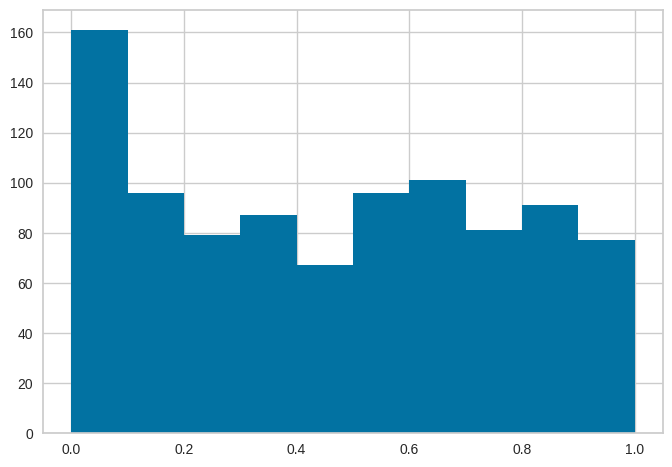

In [36]:
# lets check the `X_train_transformed` to see effect of params passed in `setup()`
get_config('X_train_transformed')['age'].hist()

**Note**: Notice that all the values are between 0 and 1 - that is because we passed `normalize=True` in the `setup()` function. If we don't remember how it compares to actual data, no problem - we can also access non-transformed values using `get_config()` and then compare. See below and notice the range of values on **x-axis** and compare it with histogram above.

<AxesSubplot:>

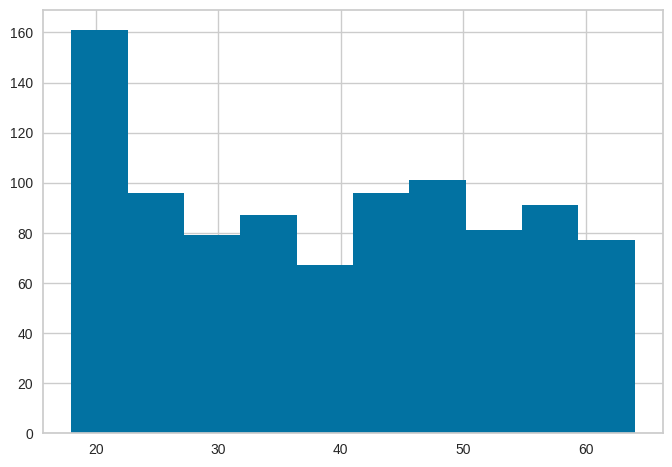

In [37]:
get_config('X_train')['age'].hist()

---

- **Compare Models**

The `compare_models()` function trains and evaluate the performance of all estimators available in the model library using **cross-validation** (CV). 

The output of this `compare_models()` function is a **scoring grid with average cross-validated scores** (to show: **average** MAE, MSE, RMSE, R2, RMSLE and MAPE accross the folds (10 by default)). 

Metrics evaluated during CV can be accessed using the `get_metrics()` function. Custom metrics can be added or removed using `add_metric()` and `remove_metric()` function.

In [38]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2701.9135,23548622.1598,4832.9291,0.8320,0.4447,0.3137,0.0680
rf,Random Forest Regressor,2772.9195,25409792.9692,5028.1973,0.8173,0.4687,0.3298,0.1560
lightgbm,Light Gradient Boosting Machine,3001.8884,25547324.5813,5044.5767,0.8147,0.5445,0.3784,31.7810
et,Extra Trees Regressor,2833.3624,28427844.2412,5305.6516,0.7991,0.4877,0.3363,0.1270
ada,AdaBoost Regressor,4175.5916,28401799.0579,5321.7006,0.7976,0.6263,0.7144,0.0500
ridge,Ridge Regression,4296.0642,38392999.7849,6176.6160,0.7308,0.5710,0.4397,0.0510
br,Bayesian Ridge,4300.6286,38387539.9069,6176.4192,0.7307,0.5881,0.4419,0.0440
lasso,Lasso Regression,4302.2469,38386534.5553,6176.4463,0.7306,0.5913,0.4430,0.0450
llar,Lasso Least Angle Regression,4302.2480,38386602.3375,6176.4516,0.7306,0.5913,0.4430,0.0450
lar,Least Angle Regression,4306.8070,38474738.1306,6183.8348,0.7297,0.5939,0.4430,0.0470


`compare_models()` function by default uses all the estimators in model library (all except models with `Turbo=False`).

To see all available models, you can use the `models()` function.

In [39]:
# check available models in pycaret
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


We can use the `include` and `exclude` parameter in the `compare_models()` function to train only a selected model or exclude a specific model from training by passing the **model ID**'s in `exclude` parameter.

In [42]:
compare_tree_models = compare_models(include= ['dt', 'rf', 'et', 'gbr', 'lightgbm'])

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,00:49:27
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Decision Tree Regressor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2701.9135,23548622.1598,4832.9291,0.8320,0.4447,0.3137,0.0670
rf,Random Forest Regressor,2772.9195,25409792.9692,5028.1973,0.8173,0.4687,0.3298,0.1690
lightgbm,Light Gradient Boosting Machine,3001.8884,25547324.5813,5044.5767,0.8147,0.5445,0.3784,34.3060
et,Extra Trees Regressor,2833.3624,28427844.2412,5305.6516,0.7991,0.4877,0.3363,0.1300
dt,Decision Tree Regressor,3399.1402,48100203.3847,6915.2984,0.6476,0.5629,0.4052,0.7630


In [43]:
# lets compare our models
compare_tree_models

GradientBoostingRegressor(random_state=123)

The function above has return trained model object as an output.

The scoring grid is only displayed and not returned.

If we need access to the scoring grid, we can use `pull()` function (to pull the stored information in the `compare_models()` function) to access the DataFrame.

In [44]:
# lets use the `pull()` function, and also to get the `Model` object, in particular, of `gbr`
# gbr = pull()
compare_tree_models_results = pull()
compare_tree_models_results

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2701.9135,2.354862e+07,4832.9291,0.8320,0.4447,0.3137,0.067
rf,Random Forest Regressor,2772.9195,2.540979e+07,5028.1973,0.8173,0.4687,0.3298,0.169
lightgbm,Light Gradient Boosting Machine,3001.8884,2.554732e+07,5044.5767,0.8147,0.5445,0.3784,34.306
et,Extra Trees Regressor,2833.3624,2.842784e+07,5305.6516,0.7991,0.4877,0.3363,0.130
dt,Decision Tree Regressor,3399.1402,4.810020e+07,6915.2984,0.6476,0.5629,0.4052,0.763


In [46]:
gbr = pull()
gbr

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2701.9135,2.354862e+07,4832.9291,0.8320,0.4447,0.3137,0.067
rf,Random Forest Regressor,2772.9195,2.540979e+07,5028.1973,0.8173,0.4687,0.3298,0.169
lightgbm,Light Gradient Boosting Machine,3001.8884,2.554732e+07,5044.5767,0.8147,0.5445,0.3784,34.306
et,Extra Trees Regressor,2833.3624,2.842784e+07,5305.6516,0.7991,0.4877,0.3363,0.130
dt,Decision Tree Regressor,3399.1402,4.810020e+07,6915.2984,0.6476,0.5629,0.4052,0.763


By default, `compare_models()` function returns the single best performing model based on the metric defined in the `sort` parameter. 

* Option 1:
To change this behavior, we can pass `n_select` parameter to select top-N models based on the metric defined in `sort` parameter.

* Option 2:
To change our code to return top-3 models based on `MAE`, we can pass `n_select=3` in the `compare_models()` function.

Let's do this and observe the output.

In [23]:
best_mae_models_top3 = compare_models(sort = 'MAE', n_select = 3)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2546.4478,21157539.8843,4557.6058,0.8472,0.4390,0.2965,0.0600
rf,Random Forest Regressor,2718.9242,23342793.2841,4803.4343,0.8312,0.4701,0.3321,0.1300
et,Extra Trees Regressor,2777.5844,26440815.4623,5119.2696,0.8077,0.4854,0.3341,0.1120
lightgbm,Light Gradient Boosting Machine,2866.3208,23847984.9828,4851.8001,0.8283,0.5358,0.3513,33.3570
dt,Decision Tree Regressor,3069.8635,40575945.5377,6311.3500,0.7002,0.5150,0.3322,0.0360
huber,Huber Regressor,3900.8831,54059505.4977,7316.3764,0.6106,0.4653,0.2186,0.0460
par,Passive Aggressive Regressor,4103.1857,63057179.8899,7866.6702,0.5662,0.4603,0.2468,0.0390
lar,Least Angle Regression,4266.4806,37463656.8145,6102.0279,0.7285,0.5946,0.4493,0.0420
lr,Linear Regression,4266.4806,37463656.8145,6102.0279,0.7285,0.5946,0.4493,0.4690
lasso,Lasso Regression,4266.5888,37460504.5442,6101.7797,0.7285,0.5953,0.4493,0.0390


In [48]:
# list of top-3 models by MAE
best_mae_models_top3

[GradientBoostingRegressor(random_state=123),
 RandomForestRegressor(n_jobs=-1, random_state=123),
 ExtraTreesRegressor(n_jobs=-1, random_state=123)]

Some other parameters that we might find useful in the `compare_models()` function are:

- `fold` : Number of folds to be used in Kfold CV. Must be at least 2. Default is 10.

- `round` : Number of decimal places the metrics in the scoring grid will be rounded to. Default is 4.

- `sort` : Metric to sort resulting metrics by. The default is `R2`.

- `n_select` : Number of top-n models to return. By default, `compare_models()` returns a single best model based on the `sort` parameter.

- `budget_time` : If set to `True`, `compare_models()` will terminate the experiment and return the best model based on the defined `sort` parameter or `n_select` within the `budget_time` param. The `budget_time` param uses the `fit_time` metric to terminate the experiment. Default is `False`.

- `errors` : If set to `True`, `compare_models()` will raise an exception when an error occurs. Default is `True`.

- `probability_threshold` : Threshold used to convert probability values into binary outcome values. Default is `0.5`.

- `parallel` : If set to `True`, `BaggingClassifier` and `VotingClassifier` will run in parallel wherever possible. Default is `True`.

- `cross_validation` : If set to `False`, CV will not be performed and the metrics returned will be based on the training set. Default is `True`.

We can check the docstring of the function for more info.

In [49]:
# help(compare_models)

---

- **Experiment Logging**

## [mlflow - PyCaret Integration](https://mlflow.org/docs/latest/tracking.html)

PyCaret integrates with many different type of experiment loggers (default = 'mlflow').

To turn on experiment tracking in PyCaret, we can set `log_experiment` and `experiment_name` parameter in the `setup()` function.

It will automatically track all the metrics, hyperparameters, and artifacts based on the defined logger.

In [5]:
# import and load dataset
from pycaret.datasets import get_data
data = get_data('insurance')

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
from pycaret.regression import *
s = setup(data, target='charges', log_experiment='mlflow', experiment_name='insurance_experiment')

,Description,Value
0,Session id,4550
1,Target,charges
2,Target type,Regression
3,Original data shape,"(1338, 7)"
4,Transformed data shape,"(1338, 10)"
5,Transformed train set shape,"(936, 10)"
6,Transformed test set shape,"(402, 10)"
7,Ordinal features,2
8,Numeric features,3
9,Categorical features,3


In [8]:
# compare models
best = compare_models()

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,04:41:17
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Linear Regression


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2523.3977,21458565.2426,4479.1194,0.8512,0.4387,0.3024,0.0560
rf,Random Forest Regressor,2638.0585,23173946.0400,4711.7898,0.8380,0.4612,0.3166,0.1260
lightgbm,Light Gradient Boosting Machine,2872.1565,23807176.2848,4767.0980,0.8339,0.5368,0.3649,35.5780
et,Extra Trees Regressor,2610.1097,25412318.9273,4957.0929,0.8205,0.4624,0.2938,0.1040
ada,AdaBoost Regressor,4067.8982,26984279.8386,5107.7185,0.8079,0.6234,0.7131,0.0400
lar,Least Angle Regression,4078.3232,36011625.6352,5923.8038,0.7496,0.6037,0.4095,0.0500
llar,Lasso Least Angle Regression,4078.5379,36009209.0814,5923.6158,0.7496,0.6005,0.4096,0.0510
br,Bayesian Ridge,4085.8766,36012060.1459,5923.8421,0.7496,0.5889,0.4108,0.0450
ridge,Ridge Regression,4093.4106,36014666.6435,5924.0613,0.7496,0.5916,0.4121,0.0370
lasso,Lasso Regression,4078.5380,36009208.4563,5923.6156,0.7496,0.6005,0.4096,0.0360


In [6]:
# start mlflow server on localhost:5000
!mlflow ui

By default, PyCaret uses `ML Flow` logger that can be changed using `log_experiment` parameter in the `setup()` function.

Following loggers are available:

- `MLFlow` : https://mlflow.org/docs/latest/tracking.html

- `wandb` : https://docs.wandb.ai/integrations/pycaret

- `comet_ml` : https://www.comet.ml/docs/python-sdk/pycaret-integration/

- `dagshub` : https://dagshub.com/docs/integrations/pycaret

Other logging related parameters that we may find useful are:

* `experiment_custom_tags`: (dict) To add custom tags to the experiment. Must be passed as a dictionary. Default is `None`.

* `experiment_name` : (str) Name of the experiment for logging purposes. If set to `None`, a unique experiment name will be automatically generated using the `timestamp` parameter. Default is `None`.

* `log_plots` : (bool) When set to `True`, certain plots are logged automatically in the `Artifacts` section of the experiment. Default is `False`.

* `log_profile` : (bool) When set to `True`, data profile is logged automatically in the `Artifacts` section of the experiment. Default is `False`.

* `log_data` : (bool) When set to `True`, dataset is logged automatically in the `Artifacts` section of the experiment. Default is `False`.

* `log_model` : (bool) When set to `True`, trained model object is logged automatically in the `Artifacts` section of the experiment. Default is `False`.

* `silent` : (bool) When set to `True`, confirmation of data types is not required. All preprocessing will be performed assuming automatically inferred data types. Not recommended for direct use except for established pipelines. Default is `False`.

* `verbose` : (bool) Progress bar not shown when `verbose` is set to `False`. Default is `True`.

For more information, check out the docstring of the `setup()` function: `help(setup)`.

```python
help(setup)
```

**Note**: 
To fix the issue encountered with the `mlflow ui` command due to a problem with the `protobuf package`, we can set the `PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION` environment variable to `python` by running the following command: 
```bash
export PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION=python
```

- **Create Model**

The `create_model()` function trains and evaluates the performance of a given estimator using cross-validation. 

The output prints a score grid that shows **Accuracy**, **AUC**, **Recall**, **Precision**, **F1**, **Kappa** and **MCC** by fold (default = 10 Fold).

Thus, the output of this `create_model()` function is a scoring grid with CV scores by fold.

Metrics evaluated during CV can be accessed using the `get_metrics()` function. 

Custom metrics can be added or removed using `add_metric()` and `remove_metric()` function.

All the available models can be accessed using the `models()` function.

In [6]:
# check all the available models in mlflow
# get_logs()

# check all the available models
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [7]:
# train linear regression (lr) model with default fold=10
# lr = create_model('lr')
dt = create_model('dt')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2336.1697,25731736.0247,5072.6459,0.8126,0.4990,0.4026
1,2476.9547,32681803.6731,5716.8001,0.7901,0.4537,0.2334
2,2741.5842,40041246.8617,6327.8153,0.7729,0.4175,0.2390
3,2550.6911,33703909.9468,5805.5069,0.6638,0.5372,0.2660
4,3204.4739,45714810.4779,6761.2728,0.6022,0.5160,0.3199
5,3288.1334,46490914.4943,6818.4246,0.7190,0.5401,0.2856
6,3396.7826,48434748.2699,6959.5078,0.7095,0.5312,0.3787
7,2506.0253,33116399.2404,5754.6850,0.7577,0.4779,0.2318
8,3206.6066,45309620.5059,6731.2421,0.7084,0.4607,0.3186


The function above has return trained model object as an output.

The scoring grid is only displayed and not returned.

If we need access to the scoring grid, we can use `pull()` function (to pull the stored information in the `create_model()` function) to access the DataFrame.

In [8]:
# lr_result = pull()
# print(type(lr_result))
# lr_result

dt_result = pull()
print(type(dt_result))
dt_result

<class 'pandas.core.frame.DataFrame'>


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2336.1697,2.573174e+07,5072.6459,0.8126,0.4990,0.4026
1,2476.9547,3.268180e+07,5716.8001,0.7901,0.4537,0.2334
2,2741.5842,4.004125e+07,6327.8153,0.7729,0.4175,0.2390
3,2550.6911,3.370391e+07,5805.5069,0.6638,0.5372,0.2660
4,3204.4739,4.571481e+07,6761.2728,0.6022,0.5160,0.3199
5,3288.1334,4.649091e+07,6818.4246,0.7190,0.5401,0.2856
6,3396.7826,4.843475e+07,6959.5078,0.7095,0.5312,0.3787
7,2506.0253,3.311640e+07,5754.6850,0.7577,0.4779,0.2318
8,3206.6066,4.530962e+07,6731.2421,0.7084,0.4607,0.3186


In [9]:
# train linear regression (lr) model with fold=3
# lr = create_model('lr', fold=3)
dt = create_model('dt', fold=3)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3084.6521,43897014.7475,6625.4822,0.7056,0.5332,0.4056
1,3471.1563,49501463.7949,7035.7277,0.6524,0.5629,0.3751
2,3050.1546,39165845.6971,6258.2622,0.7245,0.5358,0.3968
Mean,3201.9877,44188108.0798,6639.8240,0.6942,0.5440,0.3925
Std,190.8513,4224515.8983,317.5609,0.0305,0.0134,0.0128


In [ ]:
# train linear regression (lr) with specific model parameters
create_model('lr', fit_intercept = False)

In [11]:
# train lr and return train score as well along with CV score
create_model('lr', return_train_score=True)

LinearRegression(n_jobs=-1)

Some other parametes that we might find very useful in the `create_model()` function are:

- `fold` : Number of folds to be used in Kfold CV. Must be at least 2. Default is 10.

- `cross_validation` : If set to `False`, CV will not be performed and the metrics returned will be based on the training set. Default is `True`.

- `engine` : If set to `None`, estimator will be created using native Pycaret code. If set to `‘tune’`, estimator will be tuned using `optimize_threshold()` function. Default is `None`.

- `fit_kwargs` : Dictionary of arguments passed to the `fit()` method of the estimator. Ignored when `engine` is set to `None`. Default is `{}`.

- `groups` : For grouped data, passed to the `groups` argument of `cross_validate()`. Only used when `engine` is set to `None`. Default is `None`.

We can check the docstring of the `create_model()` function for more info: `help(create_model)`.

- **Tune Model**

The `tune_model` function tunes the hyperparameters of the model. 

The output of this function is a scoring grid with cross-validated scores by fold.

The output prints a score grid that shows **Accuracy**, **AUC**, **Recall**, **Precision**, **F1**, **Kappa** and **MCC** by fold (default = 10 Fold).

The best model is selected based on the metric defined in optimize parameter. 

Metrics evaluated during cross-validation can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function.

In [12]:
# train a dt model with default parameters
dt = create_model('dt')

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,05:37:01
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Decision Tree Regressor


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2336.1697,25731736.0247,5072.6459,0.8126,0.4990,0.4026
1,2476.9547,32681803.6731,5716.8001,0.7901,0.4537,0.2334
2,2741.5842,40041246.8617,6327.8153,0.7729,0.4175,0.2390
3,2550.6911,33703909.9468,5805.5069,0.6638,0.5372,0.2660
4,3204.4739,45714810.4779,6761.2728,0.6022,0.5160,0.3199
5,3288.1334,46490914.4943,6818.4246,0.7190,0.5401,0.2856
6,3396.7826,48434748.2699,6959.5078,0.7095,0.5312,0.3787
7,2506.0253,33116399.2404,5754.6850,0.7577,0.4779,0.2318
8,3206.6066,45309620.5059,6731.2421,0.7084,0.4607,0.3186


In [13]:
# tune hyperparameters of dt model
tuned_dt = tune_model(dt)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1895.0036,18860410.1104,4342.8574,0.8627,0.4210,0.2249
1,1432.3613,14046139.4690,3747.8180,0.9098,0.3388,0.1111
2,1775.4851,19450556.3937,4410.2785,0.8897,0.2814,0.1114
3,1931.6198,24354972.4543,4935.0757,0.7571,0.4575,0.1537
4,1962.0685,23514233.4196,4849.1477,0.7954,0.3878,0.1405
5,2140.0889,30488858.4726,5521.6717,0.8157,0.4854,0.1195
6,1862.3202,21780319.6743,4666.9390,0.8693,0.3636,0.1306
7,1436.4225,15903264.6833,3987.8898,0.8837,0.3633,0.1045
8,2136.9926,25401673.4060,5040.0073,0.8365,0.3745,0.1418


Fitting 10 folds for each of 10 candidates, totalling 100 fits


Metric to optimize can be defined in `optimize` parameter (default = `Accuracy`).

Also, a custom tuned grid can be passed with `custom_grid` parameter (default = `None`).

In [14]:
dt

DecisionTreeRegressor(random_state=4550)

In [15]:
# define tuning grid
dt_grid = {'max_depth' : [None, 2, 4, 6, 8, 10, 12]}

# tune model with custom grid and metric = MAE
tuned_dt_custom = tune_model(dt, custom_grid = dt_grid, optimize = 'MAE')

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,05:37:27
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Decision Tree Regressor


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2289.8777,16079977.9108,4009.9848,0.8829,0.4031,0.2859
1,2448.6175,18492519.7033,4300.2930,0.8812,0.4342,0.2976
2,2525.9999,25195082.2742,5019.4703,0.8571,0.3846,0.2794
3,2521.7637,24119657.2482,4911.1768,0.7594,0.5046,0.3106
4,3028.6949,30677931.1234,5538.7662,0.7330,0.4747,0.3387
5,3198.1431,32758614.1545,5723.5141,0.8020,0.5054,0.2985
6,2750.4626,24269586.9611,4926.4173,0.8544,0.3968,0.2662
7,2316.5115,19437931.0310,4408.8469,0.8578,0.4071,0.2430
8,3058.2257,26248038.7803,5123.2840,0.8311,0.4386,0.3622


Fitting 10 folds for each of 7 candidates, totalling 70 fits


In [16]:
# to access the tuner object, we can set `return_tuner = True`
tuned_dt_custom, tuner = tune_model(dt, return_tuner = True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1895.0036,18860410.1104,4342.8574,0.8627,0.4210,0.2249
1,1432.3613,14046139.4690,3747.8180,0.9098,0.3388,0.1111
2,1775.4851,19450556.3937,4410.2785,0.8897,0.2814,0.1114
3,1931.6198,24354972.4543,4935.0757,0.7571,0.4575,0.1537
4,1962.0685,23514233.4196,4849.1477,0.7954,0.3878,0.1405
5,2140.0889,30488858.4726,5521.6717,0.8157,0.4854,0.1195
6,1862.3202,21780319.6743,4666.9390,0.8693,0.3636,0.1306
7,1436.4225,15903264.6833,3987.8898,0.8837,0.3633,0.1045
8,2136.9926,25401673.4060,5040.0073,0.8365,0.3745,0.1418


Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [17]:
# model object (stored in `tuned_dt_custom`)
tuned_dt_custom

DecisionTreeRegressor(criterion='absolute_error', max_depth=6, max_features=1.0,
                      min_impurity_decrease=0, min_samples_leaf=2,
                      min_samples_split=7, random_state=4550)

In [18]:
tuner

RandomizedSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
                   estimator=Pipeline(memory=Memory(location=None),
                                      steps=[('numerical_imputer',
                                              TransformerWrapper(include=['age',
                                                                          'bmi',
                                                                          'children'],
                                                                 transformer=SimpleImputer())),
                                             ('categorical_imputer',
                                              TransformerWrapper(include=['sex',
                                                                          'smoker',
                                                                          'region'],
                                                                 transformer=SimpleImputer(strategy='most_fr...
                                                                        7, 8, 9,
                                                                        10, 11,
                                                                        12, 13,
                                                                        14, 15,
                                                                        16],
                                        'actual_estimator__max_features': [1.0,
                                                                           'sqrt',
                                                                           'log2'],
                                        'actual_estimator__min_impurity_decrease': [0,
                                                                                    0.0001,
                                                                                    0.001,
                                                                                    0.01,
                                                                                    0.0002,
                                                                                    0.002,
                                                                                    0.02,
                                                                                    0.0005,
                                                                                    0.005,
                                                                                    0.05,
                                                                                    0.1,
                                                                                    0.2,
                                                                                    0.3,
                                                                                    0.4,
                                                                                    0.5],
                                        'actual_estimator__min_samples_leaf': [2,
                                                                               3,
                                                                               4,
                                                                               5,
                                                                               6],
                                        'actual_estimator__min_samples_split': [2,
                                                                                5,
                                                                                7,
                                                                                9,
                                                                                10]},
                   random_state=4550, refit=False, scoring='r2', verbose=1)

The default search algorithm is `RandomizedSearchCV`from `sklearn`.

This can be changed by using `search_library` and `search_algorithm` parameters.

In [19]:
# tune dt using `optuna` library
tuned_dt = tune_model(dt, search_library = 'optuna')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2351.1107,15419233.2792,3926.7332,0.8877,0.4101,0.3146
1,2416.7411,15955962.3122,3994.4915,0.8975,0.4283,0.3229
2,2345.0364,18286433.2184,4276.2639,0.8963,0.3386,0.2533
3,2627.9355,25400548.1905,5039.8957,0.7466,0.4714,0.3201
4,3084.1769,26641548.3049,5161.5451,0.7682,0.4560,0.3422
5,3106.7955,32233691.7522,5677.4723,0.8052,0.4863,0.2638
6,2944.5450,22593827.4850,4753.2965,0.8645,0.4166,0.3235
7,2326.4853,16823857.5856,4101.6896,0.8769,0.4042,0.2728
8,2865.1743,25374908.1634,5037.3513,0.8367,0.4163,0.3305


[I 2023-10-03 05:38:03,506] Searching the best hyperparameters using 936 samples...
[I 2023-10-03 05:38:16,621] Finished hyperparameter search!


For more details on all available `search_library` and `search_algorithm` please see the docstring.

Some other parameters that we might find useful in the `tune_model()` function are:

- `n_iter` : Number of iterations within the Random Search. Increasing `n_iter` will decrease the time it takes to finish the search. If `None`, `n_iter` will be set to 10. Default is `None`.

- `fold` : Number of folds to be used in Kfold CV. Must be at least 2. Default is 10.

- `optimize` : Metric to optimize during the Random Search. Can be one of `Accuracy`, `AUC`, `Recall`, `Precision`, `F1`, `Kappa`, `MCC`. Default is `Accuracy`.

- `custom_grid` : To use custom hyperparameters for tuning pass a dictionary with parameter name and values to be iterated. When set to `None` it uses pre-defined tuning grid. Default is `None`.

- `search_library` : The search library used for tuning. Can be one of `scikit-learn` or `scikit-optimize`. Default is `scikit-learn`.

- `search_algorithm` : The search algorithm used for optimization. Can be one of `RandomGridSearch`, `GridSearch`, `BayesianOptimization`, `TPESearch`, `OptunaOptimization`, `Optimize`. Default is `RandomGridSearch`.

- `early_stopping` : If set to `True`, `tune_model()` will stop the search early if no improvement is seen in the `optimize` metric compared to the last `n_iter` defined. Default is `False`.

- `choose_better` : If set to `True`, `choose_better()` function will be applied to return the best model based on the `optimize` parameter. Default is `True`.

- `verbose` : Progress bar not shown when `verbose` is set to `False`. Default is `True`.

- `groups` : For grouped data, passed to the `groups` argument of `cross_validate()`. Only used when `engine` is set to `None`. Default is `None`.

We can check the docstring of the `tune_model()` function for more info: `help(tune_model)`.

---

- **Ensemble Model**

The `ensemble_model` function ensembles a given estimator. The output of this function is a scoring grid with CV scores by fold. Metrics evaluated during CV can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function.

In [20]:
# ensemble with `bagging` method
ensemble_model(dt, method = 'Bagging')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2440.4259,18122212.6249,4257.0192,0.8680,0.4677,0.3798
1,2370.2086,18715739.9218,4326.1692,0.8798,0.4340,0.2708
2,2337.6024,25801001.0716,5079.4686,0.8537,0.3437,0.2085
3,2919.4431,30113355.3342,5487.5637,0.6996,0.5680,0.3733
4,2910.1441,27332272.8963,5228.0276,0.7622,0.4837,0.3252
5,3083.6791,31436049.2123,5606.7860,0.8100,0.4772,0.2569
6,2963.8019,26449655.9378,5142.9229,0.8413,0.4349,0.3216
7,2249.7117,20189336.6862,4493.2546,0.8523,0.4692,0.2609
8,3058.8787,26969982.0320,5193.2631,0.8264,0.5262,0.4536


BaggingRegressor(estimator=DecisionTreeRegressor(random_state=4550),
                 random_state=4550)

In [21]:
# ensemble with `boosting` method
ensemble_model(dt, method = 'Boosting')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2701.1615,33016097.0211,5745.9635,0.7596,0.5697,0.4673
1,2029.4562,26902130.6110,5186.7264,0.8272,0.3597,0.1445
2,2165.9195,25580349.8599,5057.7020,0.8549,0.3192,0.1475
3,2247.0333,27383156.3935,5232.8918,0.7268,0.4801,0.1997
4,2419.2412,30547174.5501,5526.9498,0.7342,0.4170,0.1838
5,2293.2748,33013043.0287,5745.6978,0.8005,0.4841,0.1177
6,2318.9574,26006491.5028,5099.6560,0.8440,0.3848,0.1855
7,2006.1474,25430275.4280,5042.8440,0.8140,0.4807,0.2186
8,2897.0326,35807386.5627,5983.9274,0.7695,0.4726,0.2855


AdaBoostRegressor(estimator=DecisionTreeRegressor(random_state=4550),
                  n_estimators=10, random_state=4550)

Some other parameters that we might find useful in the `ensemble_model()` function are:

- `method` : Can be one of `Bagging`, `Boosting`, `Super Learner`. Default is `Bagging`.

- `choose_better` : If set to `True`, `choose_better()` function will be applied to return the best model based on the `optimize` parameter. Default is `True`.

- `n_estimators` : Number of estimators to be used in ensemble creation. Default is 10.

- `groups` : For grouped data, passed to the `groups` argument of `cross_validate()`. Only used when `engine` is set to `None`. Default is `None`.

- `fit_kwargs` : Dictionary of arguments passed to the `fit()` method of the estimator. Ignored when `engine` is set to `None`. Default is `{}`.

- `return_train_score` : If `True`, training scores will be included. Computing training scores is used to get insights on how different parameter settings impact the overfitting/underfitting trade-off. Default is `False`.

We can check the docstring of the `ensemble_model()` function for more info: `help(ensemble_model)`.

---

- **Blend Models**

The `blend_models` function trains a `VotingRegressor` for select models passed in the `estimator_list` parameter. The output of this function is a scoring grid with CV scores by fold. Metrics evaluated during CV can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function.

In [24]:
# top-3 models based on MAE
best_mae_models_top3

[GradientBoostingRegressor(random_state=7240),
 RandomForestRegressor(n_jobs=-1, random_state=7240),
 ExtraTreesRegressor(n_jobs=-1, random_state=7240)]

In [25]:
# bled top-3 models
blend_models(best_mae_models_top3)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2568.1521,21256642.0342,4610.4926,0.8006,0.4550,0.3244
1,2900.6978,25325503.0423,5032.4450,0.7920,0.5028,0.3750
2,3009.4673,29559079.2351,5436.8262,0.8538,0.4294,0.2837
3,3029.2482,30100056.9430,5486.3519,0.8264,0.5349,0.3667
4,2340.1850,19482995.2536,4413.9546,0.8444,0.4912,0.2931
5,2580.6120,22120234.9215,4703.2154,0.7888,0.4631,0.2934
6,2345.0657,17723004.2842,4209.8699,0.9035,0.4395,0.3481
7,2398.9748,17050408.5785,4129.2140,0.8907,0.3830,0.2569
8,2989.8699,25394551.6266,5039.3007,0.7837,0.4740,0.3112


VotingRegressor(estimators=[('Gradient Boosting Regressor',
                             GradientBoostingRegressor(random_state=7240)),
                            ('Random Forest Regressor',
                             RandomForestRegressor(n_jobs=-1,
                                                   random_state=7240)),
                            ('Extra Trees Regressor',
                             ExtraTreesRegressor(n_jobs=-1,
                                                 random_state=7240))],
                n_jobs=-1)

Some other parameters that we might find useful in the `blend_models()` function are:

- `choose_better` : If set to `True`, `choose_better()` function will be applied to return the best model based on the `optimize` parameter. Default is `True`.

- `weights` : Sequence of weights (`float` or `int`) to weight the occurrences of predicted class labels (`hard` voting) or class probabilities before averaging (`soft` voting). Uses uniform weights when `weights=None`. Default is `None`.

- `optimize` : Metric to optimize during the Random Search. Can be one of `Accuracy`, `AUC`, `Recall`, `Precision`, `F1`, `Kappa`, `MCC`. Default is `Accuracy`.

- `fit_kwargs` : Dictionary of arguments passed to the `fit()` method of the estimator. Ignored when `engine` is set to `None`. Default is `{}`.

- `return_train_score` : If `True`, training scores will be included. Computing training scores is used to get insights on how different parameter settings impact the overfitting/underfitting trade-off. Default is `False`.

We can check the docstring of the `blend_models()` function for more info: `help(blend_models)`.

---

- **Stack Models**

The `stack_models` function trains a meta-model over select estimators passed in the estimator_list parameter. The output of this function is a scoring grid with CV scores by fold. Metrics evaluated during CV can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function.

In [26]:
# stack models
stack_models(best_mae_models_top3)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2462.1075,19840212.9884,4454.2354,0.8139,0.4284,0.2905
1,2911.8512,25837554.8862,5083.0655,0.7878,0.4772,0.3130
2,3032.2460,30709096.5741,5541.5789,0.8481,0.4435,0.2827
3,2761.0322,27885586.1066,5280.6805,0.8392,0.4915,0.2959
4,2264.8948,17795509.0605,4218.4724,0.8578,0.4783,0.2895
5,2754.8908,23131868.5860,4809.5601,0.7791,0.4768,0.2944
6,2367.1419,16079198.2564,4009.8876,0.9124,0.4466,0.3696
7,2388.6776,16285225.6755,4035.4957,0.8956,0.3681,0.2545
8,2840.6040,23078275.2262,4803.9853,0.8034,0.4444,0.2882


StackingRegressor(cv=5,
                  estimators=[('Gradient Boosting Regressor',
                               GradientBoostingRegressor(random_state=7240)),
                              ('Random Forest Regressor',
                               RandomForestRegressor(n_jobs=-1,
                                                     random_state=7240)),
                              ('Extra Trees Regressor',
                               ExtraTreesRegressor(n_jobs=-1,
                                                   random_state=7240))],
                  final_estimator=LinearRegression(n_jobs=-1), n_jobs=-1,
                  passthrough=True)

Some other parameters that we might find useful in the `stack_models()` function are:

- `meta_model` : Estimator to be used as meta-model. If set to `None`, Logistic Regression is used as a meta-model. Default is `None`.

- `restack` : If set to `True`, it will train the meta-model using the whole dataset including the hold-out sample created during the `setup()` stage. Default is `False`.

- `optimize` : Metric to optimize during the Random Search. Can be one of `Accuracy`, `AUC`, `Recall`, `Precision`, `F1`, `Kappa`, `MCC`. Default is `Accuracy`.

- `choose_better` : If set to `True`, `choose_better()` function will be applied to return the best model based on the `optimize` parameter. Default is `True`.

- `return_train_score` : If `True`, training scores will be included. Computing training scores is used to get insights on how different parameter settings impact the overfitting/underfitting trade-off. Default is `False`.

We can check the docstring of the `stack_models()` function for more info: `help(stack_models)`.



---

- **Plot Model**

The `plot_model` function analyzes the performance of a trained model on the hold-out set. It may require re-training the model in certain cases.

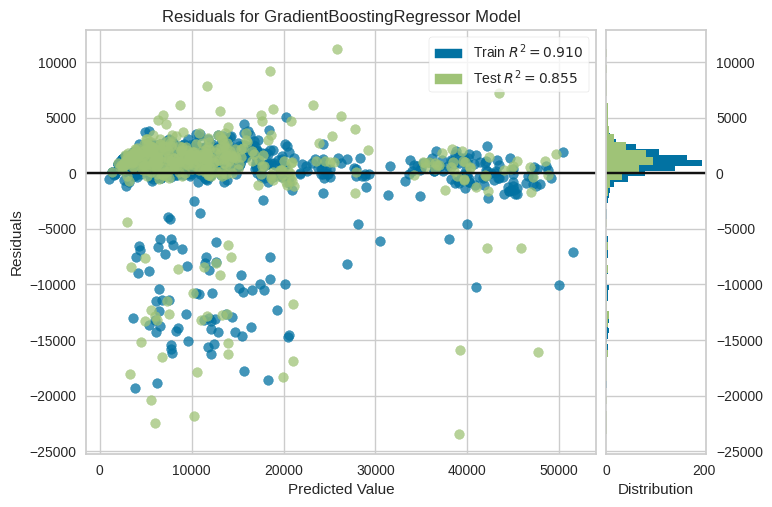

In [9]:
# plot residuals
plot_model(best, plot = 'residuals')

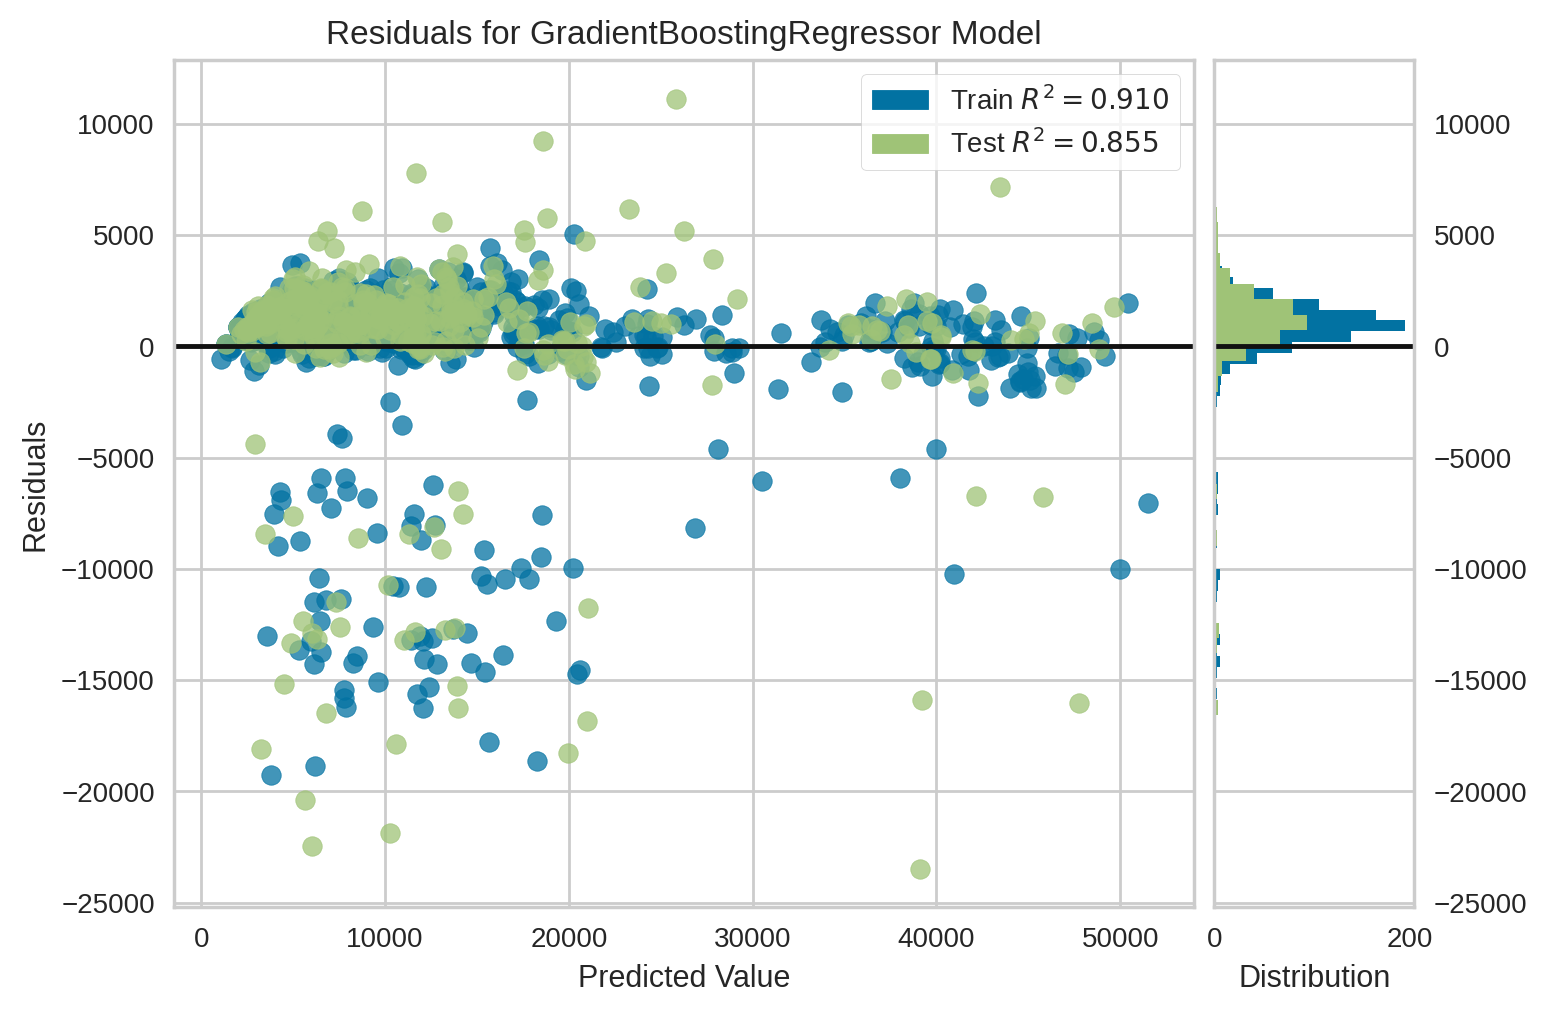

In [10]:
# to control the scale of plot
plot_model(best, plot = 'residuals', scale = 2)

In [11]:
# to save the plot
plot_model(best, plot = 'residuals', save=True)

'Residuals.png'

Some other parameters that we might find useful in the `plot_model()` function are:

- `fit_kwargs` : Dictionary of arguments passed to the `fit()` method of the estimator. Ignored when `engine` is set to `None`. Default is `{}`.

- `plot_kwargs` : Dictionary of arguments passed to the `plot_model()` method. Default is `{}`.

- `groups` : For grouped data, passed to the `groups` argument of `cross_validate()`. Only used when `engine` is set to `None`. Default is `None`.

- `display_format` : Default is `None`.


We can check the docstring of the `plot_model()` function for more info: `help(plot_model)`.

---

- **Interpret Model**

The `interpret_model` function analyzes the predictions generated from a trained model. Most plots in this function are implemented based on the SHAP (Shapley Additive exPlanations). For more info on this, please [see: SHAP](https://shap.readthedocs.io/en/latest/)

In [12]:
# train lightgbm model
lightgbm = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2860.1100,21682966.9356,4656.4973,0.8572,0.4930,0.3635
1,3170.3179,31361412.9357,5600.1262,0.7863,0.4965,0.3378
2,3583.0524,40968774.6863,6400.6855,0.7924,0.6532,0.3343
3,2525.6145,15241306.0054,3904.0115,0.8788,0.5555,0.3802
4,2539.5004,12019359.1668,3466.8947,0.9141,0.5433,0.3690
5,2735.8038,16616650.7983,4076.3526,0.8891,0.5188,0.4249
6,3525.9507,39027453.3417,6247.1956,0.6708,0.5878,0.3606
7,2280.4013,12870638.7631,3587.5672,0.8682,0.5292,0.4389
8,2979.4940,30780192.5842,5547.9900,0.7970,0.5130,0.3177


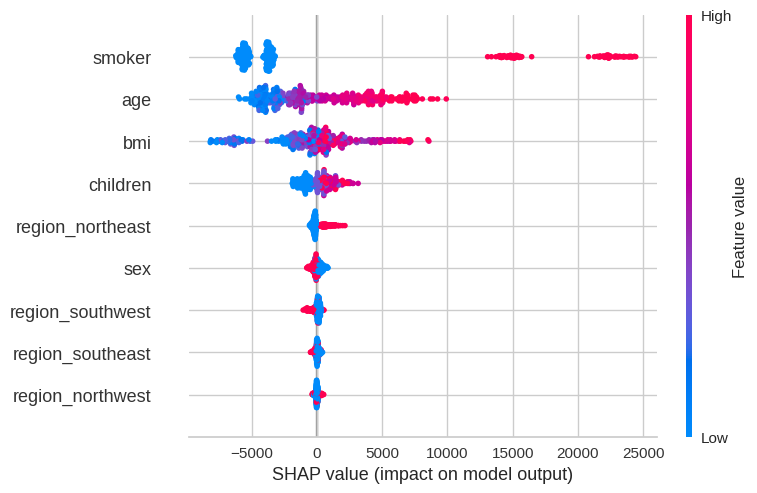

In [13]:
# interpret summary model
interpret_model(lightgbm, plot='summary')

In [14]:
# reason plot for test set observation 1
interpret_model(lightgbm, plot='reason', observation=1)

Some other parameters that we might find useful in the `interpret_model()` function are:

- `plot` : Type of plot to be returned. Can be one of `‘summary’` and `‘correlation’`. Default is `‘summary’`.

- `feature` : Feature to be used for interpretation. Default is `None`.

- `use_train_data` : When set to `True`, plots shap values based on training data. By default, it is set to `False` and uses test set for plotting.

- `X_new_sample` : When set to a pandas dataframe, `interpret_model()` creates a SHAP interpretation plot based on the `X_new_sample` passed as a param. Default is `None`.

- `y_new_sample` : When set to a pandas series, `interpret_model()` creates a SHAP interpretation plot based on the `y_new_sample` passed as a param. Default is `None`.

- `save` : When set to `True`, `interpret_model()` saves the `plot` grid in current working directory as `png` file. Default is `False`.

- `observation` : Observation number in test set for interpretation. Default is `None`.


We can check the docstring of the `interpret_model()` function for more info: `help(interpret_model)`.

---

- **Get Leaderboard**

This `get_leaderboard()` function returns the leaderboard of all models trained in the current setup. 

The `sort_values()` function can be used to sort the leaderboard by a specific metric, the `by` parameter controls the order of the leaderboard. The default value of `by` parameter is `R2`. Other options are `AUC`, `Recall`, `Precision`, `F1`, `Kappa`, `MCC` and `Accuracy`.

the `ascending` parameter controls the order of the leaderboard. The default value of `ascending` parameter is `True`. Other options are `False` and `True`.

The `iloc[]` function can be used to return a specific number of rows from top/bottom of the leaderboard. For example, `get_leaderboard(sort = 'Accuracy').iloc[0:2]` will return the top 2 models sorted by `Accuracy` instead of `R2`.

For example, `get_leaderboard(sort = 'Accuracy')` will return the score grid sorted by `Accuracy` instead of `R2`.

In [15]:
# get leaderboard
lb = get_leaderboard()
lb

,Model Name,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
Index,,,,,,,,
0,Linear Regression,"(TransformerWrapper(include=['age', 'bmi', 'ch...",4078.3232,3.601163e+07,5923.8038,0.7496,0.6037,0.4095
1,Lasso Regression,"(TransformerWrapper(include=['age', 'bmi', 'ch...",4078.5380,3.600921e+07,5923.6156,0.7496,0.6005,0.4096
2,Ridge Regression,"(TransformerWrapper(include=['age', 'bmi', 'ch...",4093.4106,3.601467e+07,5924.0613,0.7496,0.5916,0.4121
3,Elastic Net,"(TransformerWrapper(include=['age', 'bmi', 'ch...",7275.7077,8.864711e+07,9367.6989,0.3827,0.7324,0.9109
4,Least Angle Regression,"(TransformerWrapper(include=['age', 'bmi', 'ch...",4078.3232,3.601163e+07,5923.8038,0.7496,0.6037,0.4095
5,Lasso Least Angle Regression,"(TransformerWrapper(include=['age', 'bmi', 'ch...",4078.5379,3.600921e+07,5923.6158,0.7496,0.6005,0.4096
6,Orthogonal Matching Pursuit,"(TransformerWrapper(include=['age', 'bmi', 'ch...",8969.7672,1.312215e+08,11406.3597,0.0842,0.8748,1.1397
7,Bayesian Ridge,"(TransformerWrapper(include=['age', 'bmi', 'ch...",4085.8766,3.601206e+07,5923.8421,0.7496,0.5889,0.4108
8,Passive Aggressive Regressor,"(TransformerWrapper(include=['age', 'bmi', 'ch...",4637.7631,6.295773e+07,7835.3519,0.5638,0.5267,0.3418


In [17]:
# select the best model based on MAE
lb.sort_values(by='MAE', ascending=True)['Model'].iloc[0]

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['age', 'bmi', 'children'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=['sex', 'smoker', 'region'],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('ordinal_encoding',
                 TransformerWrapper(include=['sex', 'smoker'],
                                    transfor...
                                                                         'data_type': dtype('O'),
                                                                         'mapping': female    0
male      1
NaN      -1
dtype: int64},
                                                                        {'col': 'smoker',
                                                                         'data_type': dtype('O'),
                                                                         'mapping': no     0
yes    1
NaN   -1
dtype: int64}]))),
                ('onehot_encoding',
                 TransformerWrapper(include=['region'],
                                    transformer=OneHotEncoder(cols=['region'],
                                                              handle_missing='return_nan',
                                                              use_cat_names=True))),
                ['trained_model',
                 GradientBoostingRegressor(random_state=8576)]])

Some other parameters that we might find useful in the `get_leaderboard()` function are:

- `finalize_models` : If set to `True`, will run `finalize_model()` before returning the leaderboard. Default is `False`.

- `fit_kwargs` : Dictionary of arguments passed to the `fit()` method of the estimator. Ignored when `engine` is set to `None`. Default is `{}`.

- `model_only` : When set to `True`, will return the trained model object only. Default is `False`.

- `groups` : For grouped data, passed to the `groups` argument of `cross_validate()`. Only used when `engine` is set to `None`. Default is `None`.

We can check the docstring of the `get_leaderboard()` function for more info: `help(get_leaderboard)`.

---

- **AutoML**

This function returns the best model out of all trained models in the current setup based on the optimize parameter. Metrics evaluated can be accessed using the `get_metrics` function.

In [18]:
# find best model based on CV metrics (i.e. scores)
automl()

GradientBoostingRegressor(random_state=8576)

---

- **Dashboard**

The dashboard function generates the interactive dashboard for a trained model. The dashboard is implemented using `ExplainerDashboard`. For more information check out [Explainer Dashboard.](explainerdashboard.readthedocs.io)

In [23]:
# `dashboard()` function
dashboard(dt, display_format = 'inline')

Generating self.shap_explainer = shap.TreeExplainer(model)
Building ExplainerDashboard..
The explainer object has no decision_trees property. so setting decision_trees=False...
Generating layout...
Calculating shap values...
Calculating predictions...
Calculating residuals...
Calculating absolute residuals...
Calculating shap interaction values...
Reminder: TreeShap computational complexity is O(TLD^2), where T is the number of trees, L is the maximum number of leaves in any tree and D the maximal depth of any tree. So reducing these will speed up the calculation.
Calculating dependencies...
Calculating importances...
Reminder: you can store the explainer (including calculated dependencies) with explainer.dump('explainer.joblib') and reload with e.g. ClassifierExplainer.from_file('explainer.joblib')
Registering callbacks...
Starting ExplainerDashboard inline (terminate it with ExplainerDashboard.terminate(8050))
